# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- The link where the data was downloaded is: http://insideairbnb.com/get-the-data/. 
- This dataset is specifically the listings in NYC. 
- The data columns can be explained when clicking on this link https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing. 
- Data used in this project was scraped on December 15, 2022.

# Loading and Preparing Datasets

In [2]:
# Dropping all of the columns which we will not use
# listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)
listingsNYC = pd.read_csv('listings.csv', dtype=object)
# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC['neighbourhood'].unique().shape[0]
listingsNYC.describe()
listingsNYC['annual_revenue'] = (365 - listingsNYC['availability_365']) *  listingsNYC['price']
listingsNYC = listingsNYC[(listingsNYC['price'] != 0)]
listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])
listingsNYC.loc[:,'log_pps']=np.log(listingsNYC['pps'])
# listingsNYC['price_bin'] = pd.cut(listingsNYC['price'], bins=range(0, 111, 10), right=False, labels=range(0, 110, 10))

In [3]:
df = listingsNYC[(listingsNYC['price']<2000) & (listingsNYC['price']>20) & (listingsNYC['minimum_nights'] < 30)]
df['price_bin'] = pd.cut(df['price'], bins=range(0, 2001, 20), right=False, labels=range(0, 2000, 20))

### Removing Outliers

# Visualizations

Text(0.5, 1.0, 'Histogram of Price')

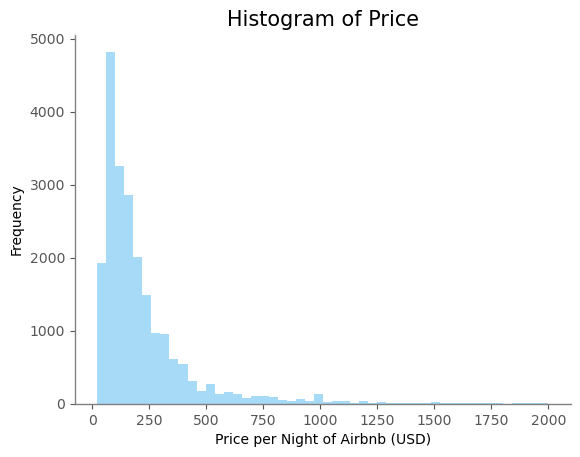

In [4]:
fig, ax = plt.subplots()
ax.hist((df['price']), bins = 50, color = '#A6DAF7')
b
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
plt.xlabel('Price per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price', fontsize = 15)

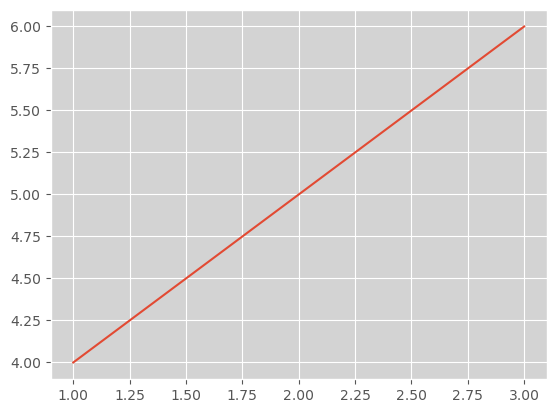

In [5]:


# Create a plot with some data
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])

# Set the background color
ax.set_facecolor('lightgrey')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Histogram of Log Price')

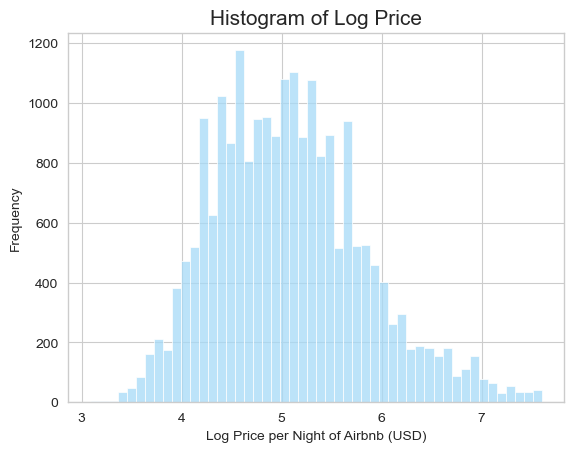

In [16]:
# fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.histplot((df['log_price']), bins = 50,color = '#A6DAF7')
# ax.set_facecolor('white')
# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')
plt.xlabel('Log Price per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Price', fontsize = 15)

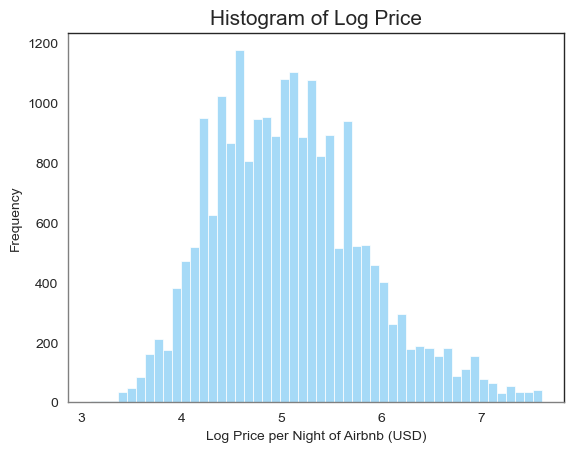

In [23]:
fig, ax = plt.subplots()

sns.set_style('white')
ax.hist((df['log_price']), bins = 50,color = '#A6DAF7')

ax.set_facecolor('white')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.xlabel('Log Price per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Price', fontsize = 15)
ax.set_xscale('linear')

<Axes: xlabel='log_price', ylabel='Density'>

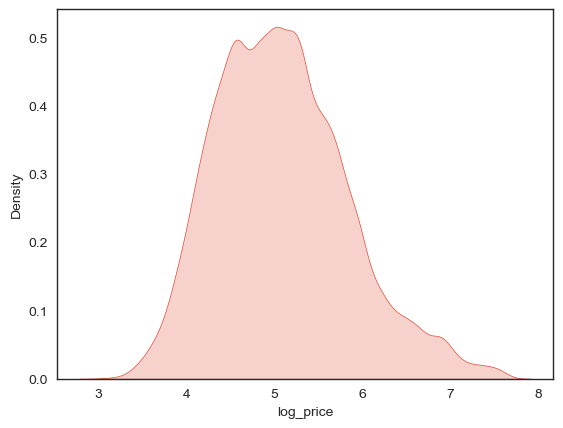

In [11]:
sns.kdeplot(df['log_price'], fill = True, label = 'Estimated PDF of Log Price')

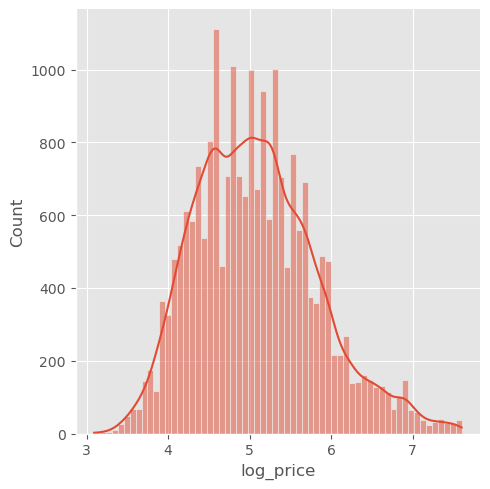

In [8]:
sns.displot((df['log_price']), kde=True)

Text(0.5, 1.0, 'Histogram of Price per Stay (pps)')

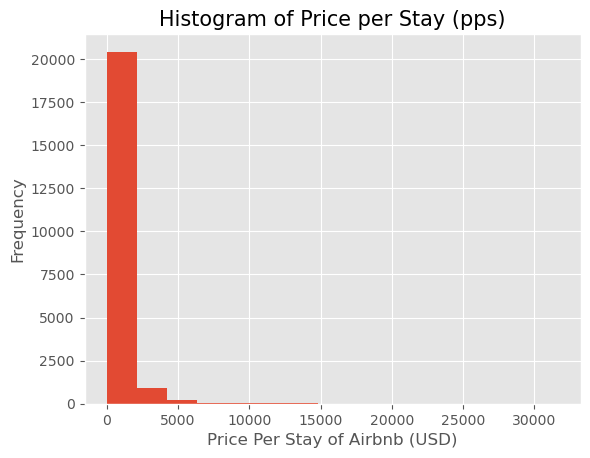

In [9]:
plt.hist((df['pps']), bins = 15)
plt.xlabel('Price Per Stay of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Stay (pps)', fontsize = 15)

In [10]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,log_price,log_pps,price_bin
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,0.03,1,267,1,NaN,5775,26950,5.616771,8.661294,260
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,...,0.73,1,0,0,NaN,150,27375,4.317488,5.010635,60
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,3.38,1,79,50,NaN,136,19448,4.219508,4.912655,60
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,124,...,1.31,3,163,14,NaN,496,25048,4.820282,6.206576,120
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Jane,Brooklyn,Fort Greene,40.691233,-73.972702,Entire home/apt,220,...,2.01,2,38,36,NaN,660,71940,5.393628,6.492240,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41525,772714221060214808,Good Vibes at The Bronx,421264574,Aridio,Bronx,Unionport,40.828074,-73.847886,Entire home/apt,125,...,NaN,1,60,0,NaN,250,38125,4.828314,5.521461,120
41526,772716724205003579,2 bedroom Condo near West Village,481177884,Steven,Manhattan,Chelsea,40.740030367077864,-73.99730227211336,Entire home/apt,1114,...,NaN,2,355,0,NaN,3342,11140,7.015712,8.114325,1100
41527,771961589340472067,Habitación Privada,409771624,Camila,Queens,Sunnyside,40.742223,-73.92331,Private room,124,...,NaN,1,360,0,NaN,248,620,4.820282,5.513429,120
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,...,NaN,3,358,0,NaN,400,560,4.382027,5.991465,80
